In [1]:
library(edgeR)
library(ggplot2)
library(tidyr)

Loading required package: limma

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"


## Load data

In [2]:
list.files("../../results/DiffExpr/pseudobulks/")

[1] "annotation_chimp.csv"              "annotation_human.csv"             
[3] "annotation_macaque.csv"            "annotation_spatial_libd_human.csv"
[5] "expression_chimp.csv"              "expression_human.csv"             
[7] "expression_macaque.csv"            "expression_spatial_libd_human.csv"

### Expression table

In [3]:
expression_human <- read.csv('../../results/DiffExpr/pseudobulks/expression_human.csv')
head(expression_human)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.human_j4,L1.human_j4,L6.human_j4,WM.human_j6,L2.human_j6,L3.human_j6,L5.human_j6,L6.human_j6,L1.human_j6,L4.human_j6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,OR4F29,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F16,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,SAMD11,1,4,1,4,6,4,0,9,5,⋯,1,5,0,0,0,1,7,0,0,4
5,NOC2L,25,75,75,217,37,94,91,115,414,⋯,156,48,82,62,43,163,361,145,18,205
6,KLHL17,5,31,12,61,14,30,35,40,179,⋯,23,6,20,13,10,49,81,43,1,42


In [4]:
expression_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/expression_spatial_libd_human.csv')
head(expression_human_libd)

,X,L1.151507,L3.151507,WM.151507,L6.151507,L5.151507,L2.151507,L4.151507,L3.151508,L1.151508,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,1,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,AL627309.1,2,1,0,0,1,0,2,1,1,⋯,0,1,1,2,1,0,0,2,1,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Merge two tables

In [5]:
expression = merge(expression_human, expression_human_libd, by='X')
head(expression)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,48,106,183,517,72,171,207,90,481,⋯,46,27,54,116,14,110,59,78,52,37
2,A1CF,0,0,1,13,1,0,0,0,5,⋯,0,0,0,0,0,0,0,0,0,0
3,A2M,107,207,173,564,282,248,256,226,360,⋯,139,101,172,401,98,210,209,321,107,113
4,A2ML1,1,1,4,3,5,1,7,1,1,⋯,1,1,0,2,0,4,0,3,0,0
5,A3GALT2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A4GALT,0,0,4,11,2,1,2,4,3,⋯,5,2,1,9,1,3,5,7,6,1


In [6]:
nrow(expression)

[1] 19404

### Annotation table

In [7]:
annotation_human <- read.csv('../../results/DiffExpr/pseudobulks/annotation_human.csv', row.names=1)
head(annotation_human)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [8]:
annotation_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/annotation_spatial_libd_human.csv', row.names=1)
head(annotation_human_libd)

,layer,sample_id,condition
,<chr>,<int>,<chr>
L1.151507,L1,151507,spatial_libd_human
L3.151507,L3,151507,spatial_libd_human
WM.151507,WM,151507,spatial_libd_human
L6.151507,L6,151507,spatial_libd_human
L5.151507,L5,151507,spatial_libd_human
L2.151507,L2,151507,spatial_libd_human


In [9]:
annotation = rbind(annotation_human, annotation_human_libd)
head(annotation, 3)
tail(annotation, 3)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human


,layer,sample_id,condition
,<chr>,<chr>,<chr>
L5.151676,L5,151676,spatial_libd_human
L2.151676,L2,151676,spatial_libd_human
L4.151676,L4,151676,spatial_libd_human


## L1

### Subset L1

In [10]:
layer <- "L1"
ann_L1 <- annotation[annotation$layer == layer, ]
ann_L1$condition <- factor(ann_L1$condition, levels=c("human", "spatial_libd_human"))
ann_L1$condition <- relevel(ann_L1$condition, ref="spatial_libd_human")
head(ann_L1)

,layer,sample_id,condition
,<chr>,<chr>,<fct>
L1.human_759,L1,human_759,human
L1.human_j12,L1,human_j12,human
L1.human_j3,L1,human_j3,human
L1.human_j4,L1,human_j4,human
L1.human_j6,L1,human_j6,human
L1.151507,L1,151507,spatial_libd_human


In [11]:
expr_L1 <- expression[, rownames(ann_L1)]
rownames(expr_L1) <- expression$X
group <- ann_L1$condition
head(expr_L1)

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,72,48,21,60,9,58,35,73,76,13,48,8,14
A1CF,1,0,0,2,0,0,0,0,0,0,0,0,0
A2M,282,72,46,58,79,180,200,296,286,78,206,60,98
A2ML1,5,0,0,0,0,3,9,8,3,1,2,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,2,3,0,0,2,4,7,11,5,1,7,3,1


In [12]:
de_exp_table <- DGEList(counts=expr_L1, group=group)
de_exp_table

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
A1BG,72,48,21,60,9,58,35,73,76,13,48,8,14
A1CF,1,0,0,2,0,0,0,0,0,0,0,0,0
A2M,282,72,46,58,79,180,200,296,286,78,206,60,98
A2ML1,5,0,0,0,0,3,9,8,3,1,2,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,2,3,0,0,2,4,7,11,5,1,7,3,1
A4GNT,0,0,0,0,0,0,0,0,0,0,0,0,0
AAAS,28,16,4,15,10,15,14,22,20,7,16,5,9
AACS,54,21,17,38,10,41,31,59,52,21,51,18,26
AADAC,0,0,0,0,0,0,0,0,0,0,0,0,0


### Filter

In [13]:
keep <- filterByExpr(de_exp_table)
sum(keep)
de_exp_table <- de_exp_table[keep, , keep.lib.sizes=FALSE]

[1] 10294

### Normalizin

In [14]:
de_exp_table <- calcNormFactors(de_exp_table)

In [15]:
de_exp_table$samples

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
L1.human_759,human,1361286,0.9515770
L1.human_j12,human,1134466,0.9732892
L1.human_j3,human,519231,1.0211137
L1.human_j4,human,1008825,1.0070942
L1.human_j6,human,326818,1.0950794
L1.151507,spatial_libd_human,935580,0.9197891
L1.151508,spatial_libd_human,816813,0.9206770
L1.151509,spatial_libd_human,1565100,0.9621641
L1.151510,spatial_libd_human,1458371,0.9589884


### Plot mds

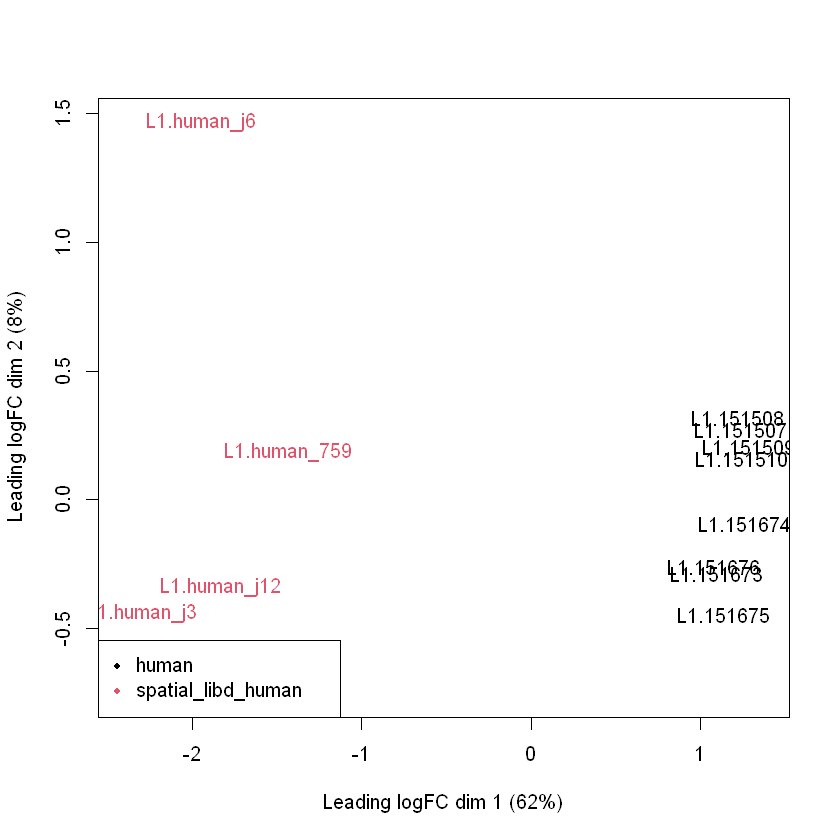

In [16]:
plotMDS(de_exp_table, col=as.numeric(de_exp_table$samples$group))
legend("bottomleft", as.character(unique(de_exp_table$samples$group)), col=1:3, pch=20)

### Estimating the Dispersion

In [17]:
de_exp_table <- estimateDisp(de_exp_table, robust=TRUE)

Using classic mode.



In [18]:
de_exp_table

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
A1BG,72,48,21,60,9,58,35,73,76,13,48,8,14
A2M,282,72,46,58,79,180,200,296,286,78,206,60,98
AAAS,28,16,4,15,10,15,14,22,20,7,16,5,9
AACS,54,21,17,38,10,41,31,59,52,21,51,18,26
AADAT,43,22,29,39,13,8,4,13,7,5,10,3,10
AAGAB,23,24,9,21,6,24,20,52,42,10,38,18,14
AAK1,90,90,29,56,18,56,47,116,96,39,118,41,56
AAMDC,19,24,2,12,9,21,15,37,35,3,20,7,7
AAMP,80,60,44,67,22,73,71,136,128,33,82,32,32
AAR2,25,20,14,30,9,19,21,28,31,11,28,7,9


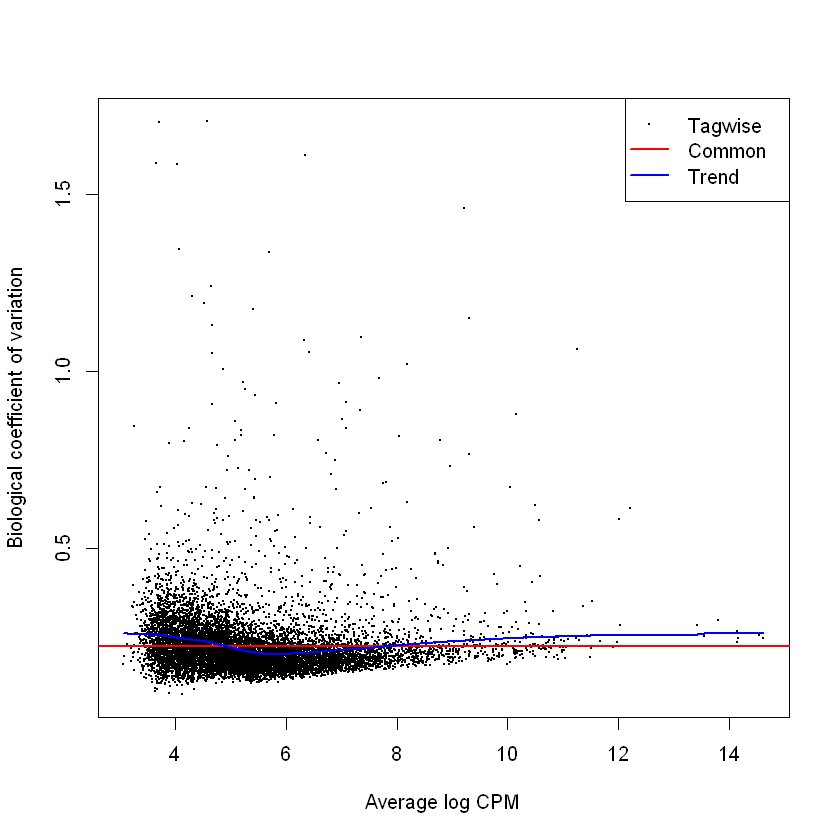

In [19]:
plotBCV(de_exp_table)

### GLM estimates of dispersion

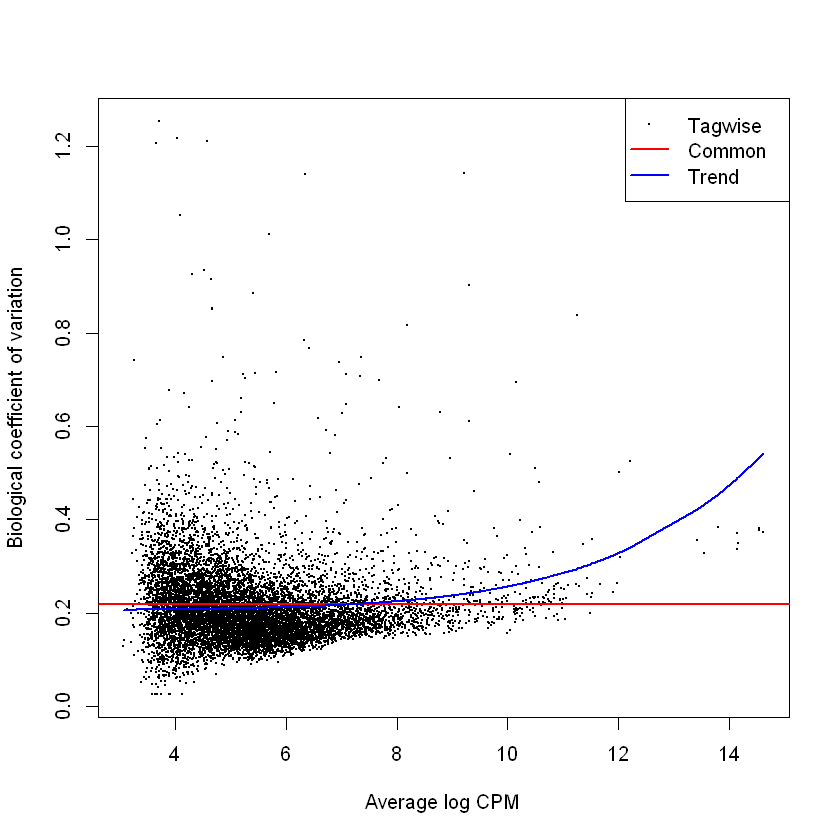

In [20]:
design.mat <- model.matrix(~ 0 + de_exp_table$samples$group)
colnames(design.mat) <- levels(de_exp_table$samples$group)
de_exp_table2 <- estimateGLMCommonDisp(de_exp_table,design.mat)
de_exp_table2 <- estimateGLMTrendedDisp(de_exp_table2, design.mat, method="power")
# You can change method to "auto", "bin.spline", "power", "spline", "bin.loess".
# The default is "auto" which chooses "bin.spline" when > 200 tags and "power" otherwise.
de_exp_table2 <- estimateGLMTagwiseDisp(de_exp_table2,design.mat)
plotBCV(de_exp_table2)

### DE test

In [21]:
et <- exactTest(de_exp_table)

In [22]:
topTags(et, n=20)

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
NLRP1,-10.917602,7.447808,3.597944e-130,3.703723e-126
IDS,-5.323610,9.229207,6.316689e-106,3.251200e-102
KRT8,-9.432596,7.344233,3.685506e-102,1.264620e-98
DPYSL3,3.629786,8.286892,3.749213e-91,9.648598e-88
SCGB2A2,-13.790573,10.308989,5.549558e-89,1.142543e-85
TFF1,-10.629920,7.174056,4.045646e-81,6.940980e-78
TFF3,-9.538870,7.453899,3.562324e-80,5.238652e-77
WDR83OS,-6.307144,6.951553,2.027588e-79,2.608999e-76
VXN,-9.768547,6.317191,1.231685e-77,1.408774e-74


In [23]:
de <- decideTestsDGE(et, adjust.method="BH", p.value=0.05)
summary(de)

       human-spatial_libd_human
Down                       2497
NotSig                     5199
Up                         2598

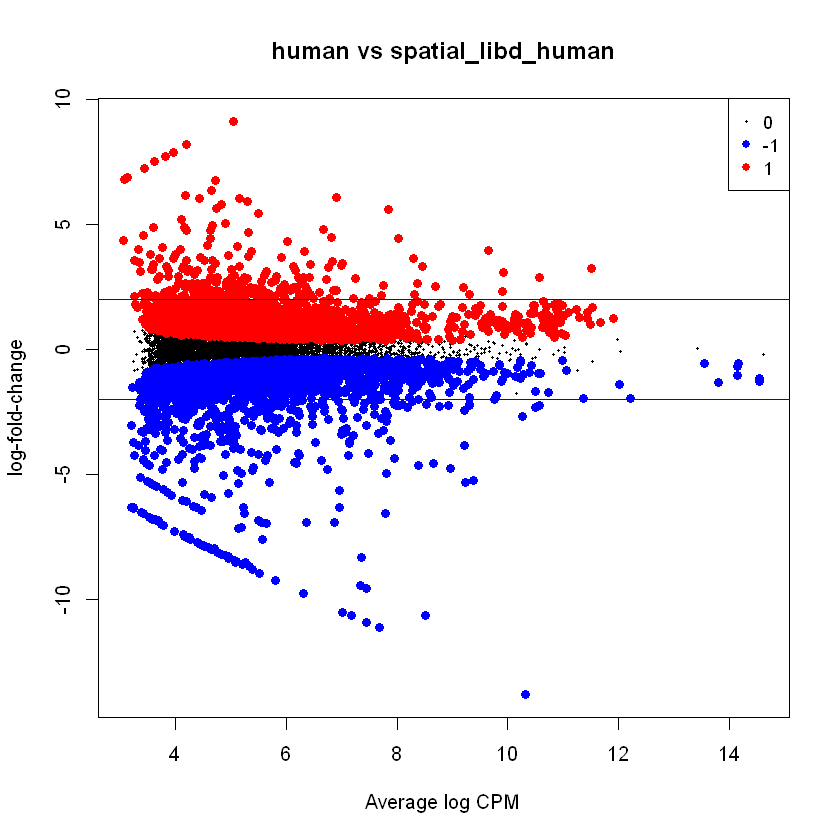

In [29]:
plotMD(et, values = c(-1, 1), hl.col=c("blue","red"))
abline(h = c(-2, 2), col = "blue")

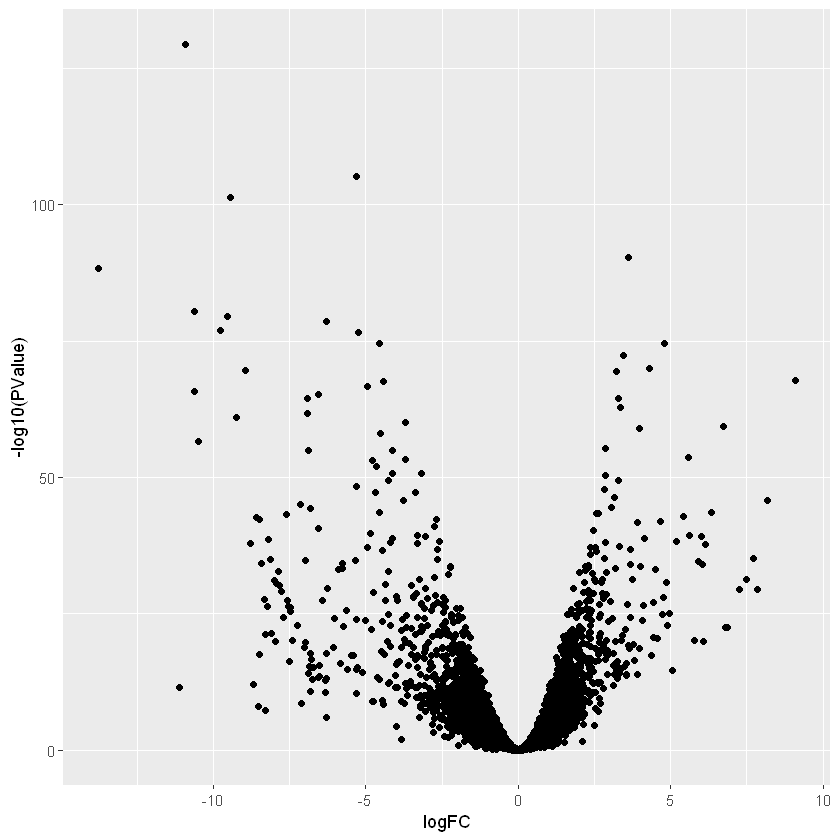

In [25]:
ggplot(et$table, aes(x=logFC,y=-log10(PValue)))+
  geom_point()